In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

fontpath = Path('/Users/zain.ali/Library/Fonts/JetBrainsMonoNL-Regular.ttf')

In [2]:
df = pd.read_csv('../data/eats_runtimes.csv', index_col=0) / 1000
df_relative = df.div(df.loc['CPU'], axis=1) * 100

/var/folders/j8/14pm9ybx14j8yz_4jw6sx9l00000gq/T/ipykernel_3836/2966583525.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - 0.2, df_relative.loc['GPU'][i] + 1, str(round(df_relative.loc['GPU'][i], 1)) + '%', **kw)
/var/folders/j8/14pm9ybx14j8yz_4jw6sx9l00000gq/T/ipykernel_3836/2966583525.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + 0.2, df_relative.loc['CPU'][i] + 1, str(round(df_relative.loc['CPU'][i], 1)) + '%', **kw)
/var/folders/j8/14pm9ybx14j8yz_4jw6sx9l00000gq/T/ipykernel_3836/2966583525.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

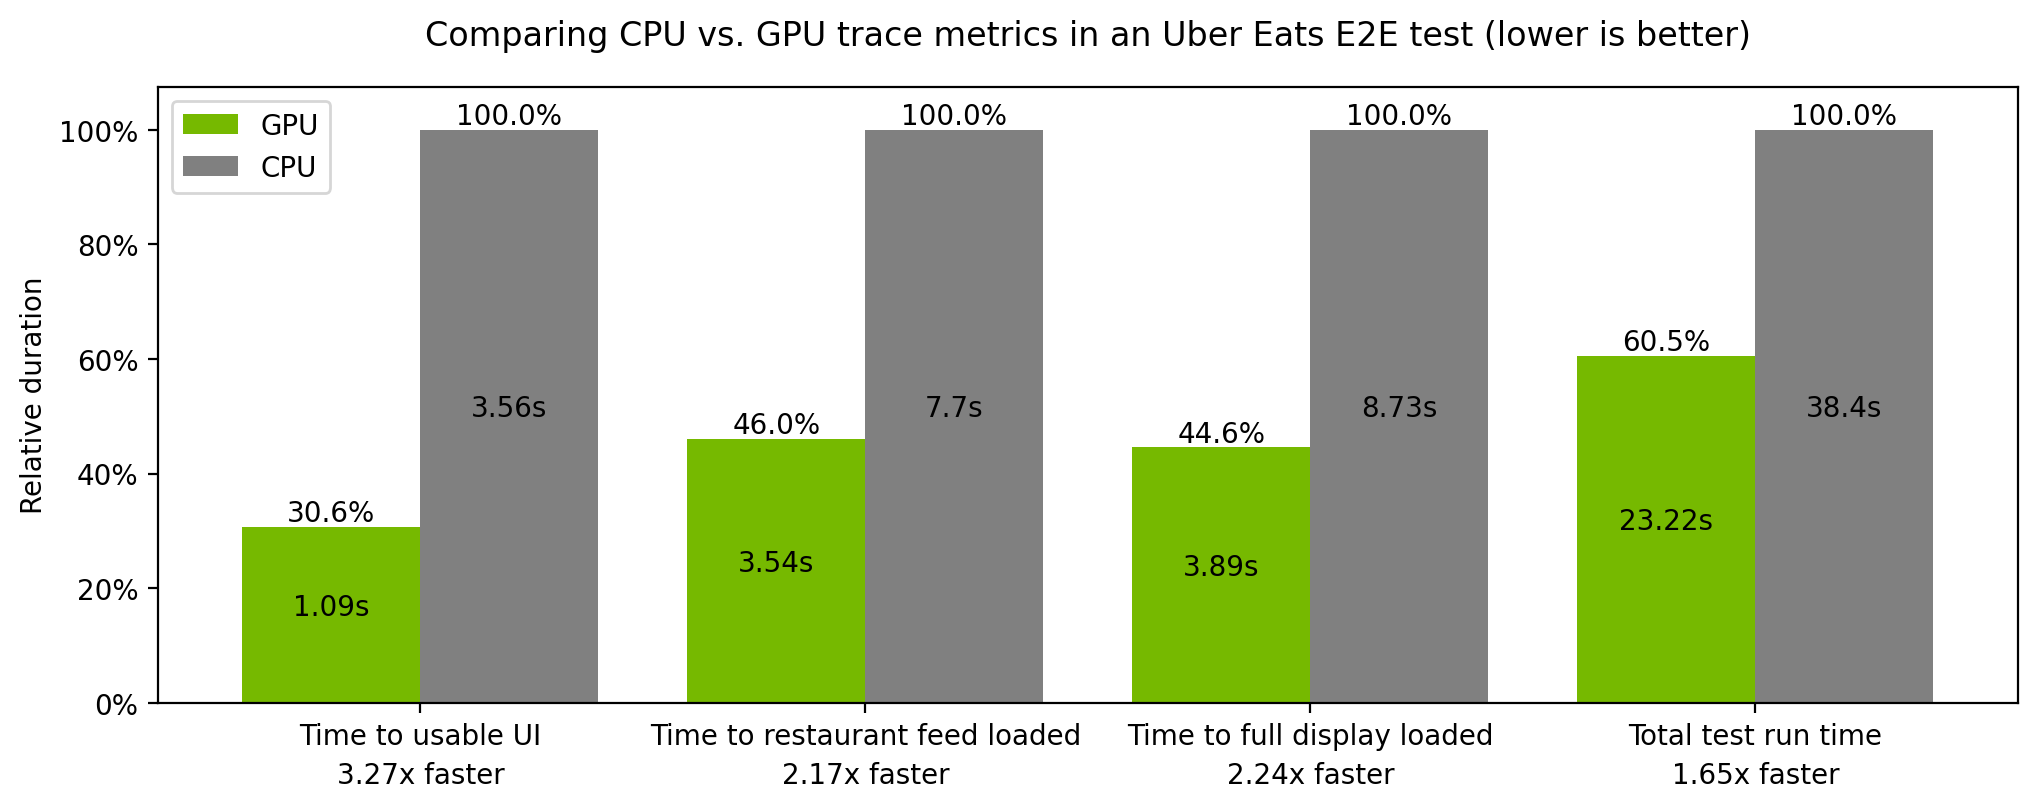

In [3]:
plt.figure(figsize=(12, 4), dpi=200)

cases = np.arange(len(df.columns))

plt.xticks(cases, df.columns)
plt.yticks(np.arange(101, step=20), labels=[str(i) + '%' for i in range(0, 101, 20)])
plt.ylabel("Relative duration")
plt.title("Comparing CPU vs. GPU trace metrics in an Uber Eats E2E test (lower is better)", pad=15)

plt.bar(cases - 0.2, df_relative.loc['GPU'], 0.4, label='GPU', color='#76B900')
plt.bar(cases + 0.2, df_relative.loc['CPU'], 0.4, label='CPU', color='grey')
plt.legend()

for i in cases:
    kw = { 'color': 'black', 'horizontalalignment': 'center' }
    # percentages
    plt.text(i - 0.2, df_relative.loc['GPU'][i] + 1, str(round(df_relative.loc['GPU'][i], 1)) + '%', **kw)
    plt.text(i + 0.2, df_relative.loc['CPU'][i] + 1, str(round(df_relative.loc['CPU'][i], 1)) + '%', **kw)
    # absolute values
    plt.text(i - 0.2, df_relative.loc['GPU'][i] / 2, str(round(df.loc['GPU'][i], 2)) + 's', **kw)
    plt.text(i + 0.2, df_relative.loc['CPU'][i] / 2, str(round(df.loc['CPU'][i], 2)) + 's', **kw)

    # speedup
    speedup = df_relative.loc['CPU'][i] / df_relative.loc['GPU'][i]
    plt.text(i, -14, f'{round(speedup, 2)}x faster', **kw)

plt.margins(0.05, 0.075)
plt.show()
